In [129]:
import cv2 as cv
import numpy as np
import skimage.io as io
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import math
from skimage.color import rgb2gray,rgb2hsv,gray2rgb
from skimage.feature import canny

In [130]:
#input : frame ,initial background with no human in it
#output: binary image 
def segmentation (frame,background):
    diff = cv.absdiff(frame, background)
    gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)
    x,y = gray.shape
    gray[gray > 35] = 255
    gray[gray <= 35] = 0
    return gray

In [163]:
#input binary image
#output array with border points
def border_extraction(img):
    #erosion = cv.erode(img, None, iterations=2)
    Human = cv.dilate(img, None, iterations=5)
    HumanEroded = cv.erode(Human, None, iterations=2)
    io.imshow(HumanEroded,cmap="gray")
    io.show()
    #border = cv.absdiff(Human, HumanEroded) 
    #return np.where(border==[255])
    border = canny(HumanEroded,low_threshold=50,high_threshold=200,sigma=0)

    io.imshow(border,cmap="gray")
    io.show()
    #return np.where(border== True)
    #borders with find contours
    pic_bin = img.astype('uint8')
    i,contours, hierarchy = cv.findContours(pic_bin,mode=cv.RETR_EXTERNAL,method=cv.CHAIN_APPROX_SIMPLE)
    black=np.copy(img*0)
    cv.drawContours(black, contours, -1, (255,255,255), 2)
    black = rgb2gray(black)
    io.imshow(black,cmap="gray")
    io.show()
    print(black)
    return np.where(black==[255])

In [164]:
#input border points
#output centroid, star points, distances from centroid to star points
def star(indices,img):
    print(indices)
    xc = 0
    yc = 0
    size = len(indices[0])

    x = indices[1]
    xc = int(sum(x)/size)
    x = pow(x-xc,2)

    y = indices[0]
    yc = int(sum(y)/size)
    y = pow(y-yc,2)
    def f(x):
        return int(math.sqrt(x))
    f2 = np.vectorize(f)
    signal =f2(x+y)
    filtered_signal= scipy.ndimage.gaussian_filter1d(signal, 4)
    plt.plot(signal, label='unfiltered signal')
    plt.legend()
    plt.grid()
    plt.show()
    plt.plot(filtered_signal, label='filtered signal, sigma=3')
    plt.legend()
    plt.grid()
    plt.show()
    print(filtered_signal)
    peaks_indx = scipy.signal.find_peaks(filtered_signal)
    print(peaks_indx)
    indx = (filtered_signal[peaks_indx[0]].tolist())
    print(indx)
    star_out = np.array([indices[0][indx],indices[1][indx]])
    print(star_out)
    
    for i in range(len(peaks_indx[0])):
    #print(indices[0][peaks_indx[i]])
        z = indices[1][peaks_indx[0][i]]
    #print(z)
        w = indices[0][peaks_indx[0][i]]
    #print(w)
        point = (z,w)
    #print(point)
        cv.circle(img,point,10,(255,0,0),2)
    
    cv.circle(img,(xc,yc),10,(255,0,0),2)
    io.imshow(img)
    io.show()

    
    return np.array([xc,yc]),star_out


In [165]:
#collective function
def functions_sequence (): 
    #get the background and keep it
    #call get a frame and call sequence of functions
    
    #segmentation step
    im1 = io.imread ("pictures/T.1.jpg")
    im2 = io.imread ("pictures/T.1_back.jpg")
    io.imshow(im1)
    io.show()
    io.imshow(im2)
    io.show()
    bin_img = segmentation(im1,im2)
    io.imshow(bin_img)
    io.show()
    
    #border extraction step from bin_img
    border = border_extraction(bin_img)
    
    #star skeletonization step
    col_img =gray2rgb(bin_img)
    centroid,star_points = star(border,col_img)

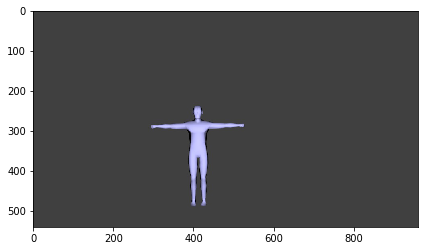

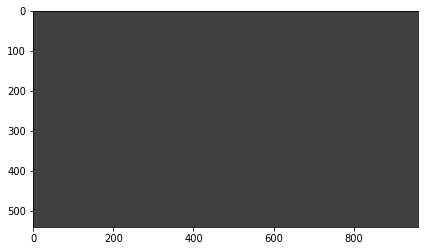

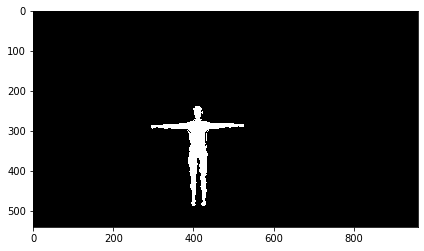

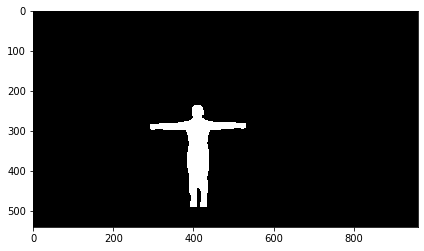

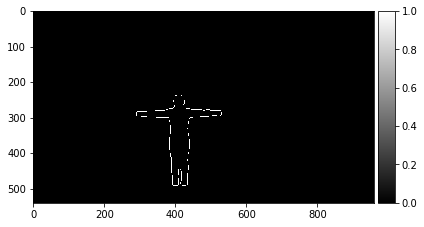

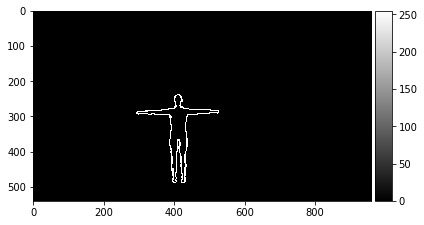

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([238, 238, 238, ..., 487, 487, 487], dtype=int64), array([407, 408, 409, ..., 427, 428, 429], dtype=int64))


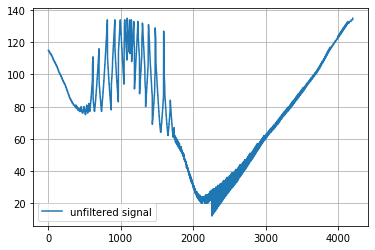

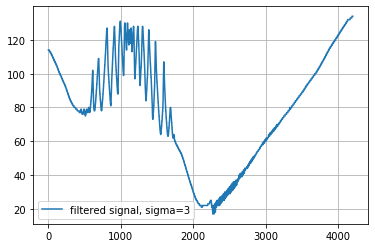

[114 114 114 ... 134 134 134]
(array([ 451,  491,  528,  557,  611,  692,  808,  911,  992, 1055, 1091,
       1120, 1142, 1175, 1234, 1299, 1385, 1478, 1593, 1685, 1732, 2238,
       2246, 2261, 2277, 2295, 2312, 2326, 2340, 2355, 2370, 2386, 2401,
       2418, 2434, 2450, 2466, 2482, 2499, 2517, 2535, 2554, 2572, 2590,
       2607, 2619, 2632, 2648, 2664, 2679, 2696, 2712, 2740, 2755, 2769,
       2783, 2798, 2814, 2829, 2959, 2975, 2991, 3008, 3041, 3060, 3080,
       3100, 3120, 3138, 3156, 3333], dtype=int64), {})
[79, 79, 79, 80, 102, 109, 127, 128, 131, 130, 130, 126, 127, 128, 128, 128, 126, 119, 107, 80, 64, 25, 25, 22, 22, 23, 24, 25, 25, 26, 27, 27, 28, 29, 30, 30, 31, 32, 33, 34, 35, 36, 36, 37, 37, 38, 40, 41, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 80]
[[245 245 245 245 247 247 249 249 250 249 249 249 249 249 249 249 249 248
  247 245 243 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240
  240 240 240 240 240 241 2

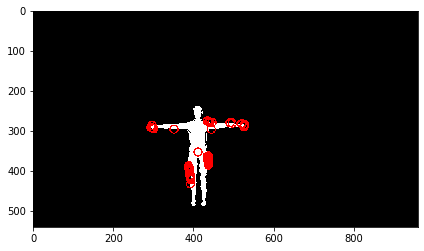

In [166]:
#main
functions_sequence()